### <b> Brain Networks and Graphs - Assignment: </b>

#### Loading the files

In [27]:
import numpy as np

struct_labels = np.load('struct_labels.npy')
structural_matrix = np.load('structural_matrix.npy')


Aligning struct_labels to structural_matrix indices:

In [28]:
struct_labels = struct_labels.astype(int) - 1
struct_labels = np.sort(struct_labels)

In [36]:
np.shape(struct_labels)

(246,)

In [30]:
np.shape(structural_matrix)

(246, 246)

In [31]:
structural_matrix

array([[ 0,  2,  6, ...,  1,  0,  4],
       [ 2, 12, 12, ...,  0,  0,  0],
       [ 6, 12, 17, ...,  6,  3,  0],
       ...,
       [ 1,  0,  6, ...,  0,  1,  1],
       [ 0,  0,  3, ...,  1,  2,  1],
       [ 4,  0,  0, ...,  1,  1,  1]], dtype=int64)

Set the diagonal elements to zero to ignore self-connections:

In [56]:
np.fill_diagonal(structural_matrix, 0)

1. Computing node strength:

In [57]:
def calculate_node_strength(matrix) -> list[int]:
    return np.sum(matrix, axis=1)


def calculate_node_degree(matrix) -> list[int]:
    return np.sum(matrix > 0, axis=1)



In [58]:
node_strength = calculate_node_strength(structural_matrix)

In [59]:
node_degree = calculate_node_degree(structural_matrix)

Plotting an Histogram for node strength measure:

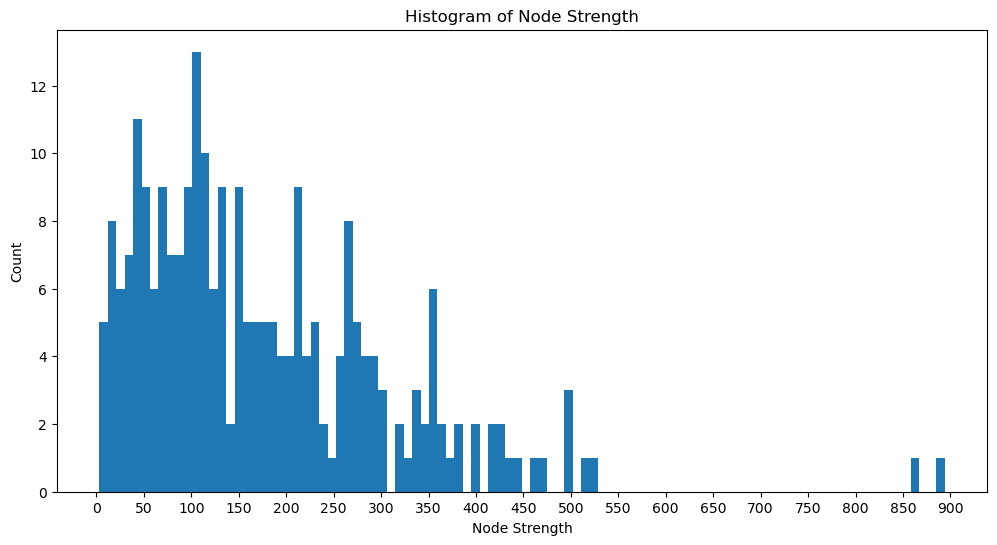

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(node_strength, bins= 100)
plt.title('Histogram of Node Strength')
plt.xlabel('Node Strength')
plt.ylabel('Count')

plt.xticks(np.arange(0, max(node_strength) + 50, 50))

plt.show()

Plotting an Histogram for node degree measure:

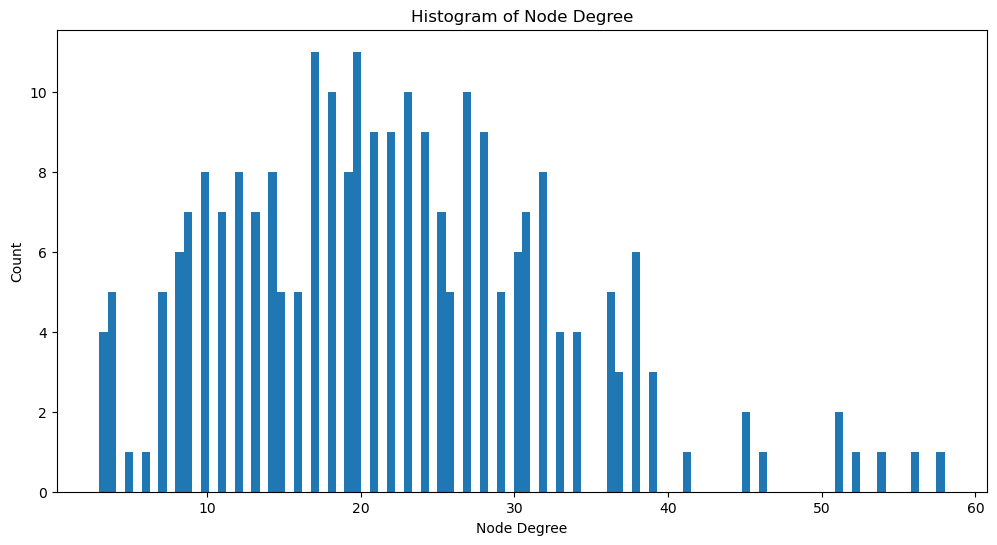

In [61]:
plt.figure(figsize=(12, 6))
plt.hist(node_degree, bins = 100)
plt.title('Histogram of Node Degree')
plt.xlabel('Node Degree')
plt.ylabel('Count')

plt.show()

2. Rich Club Coefficients:

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_rich_club_coefficient(matrix, k):

    degrees = np.sum(matrix > 0, axis=1)

    rich_nodes = np.where(degrees > k)[0]
    
    subgraph = matrix[np.ix_(rich_nodes, rich_nodes)]
    
    E_greater_k = np.sum(subgraph) / 2
    N_greater_k = len(rich_nodes)
    
    if N_greater_k < 2:
        return 0.0
    
    max_edges = N_greater_k * (N_greater_k - 1) / 2
    
    phi_k = E_greater_k / max_edges
    
    return phi_k

In [63]:
max_degree = np.max(node_degree)
rich_club_coefficients = [calculate_rich_club_coefficient(structural_matrix, k) for k in range(max_degree + 1)]


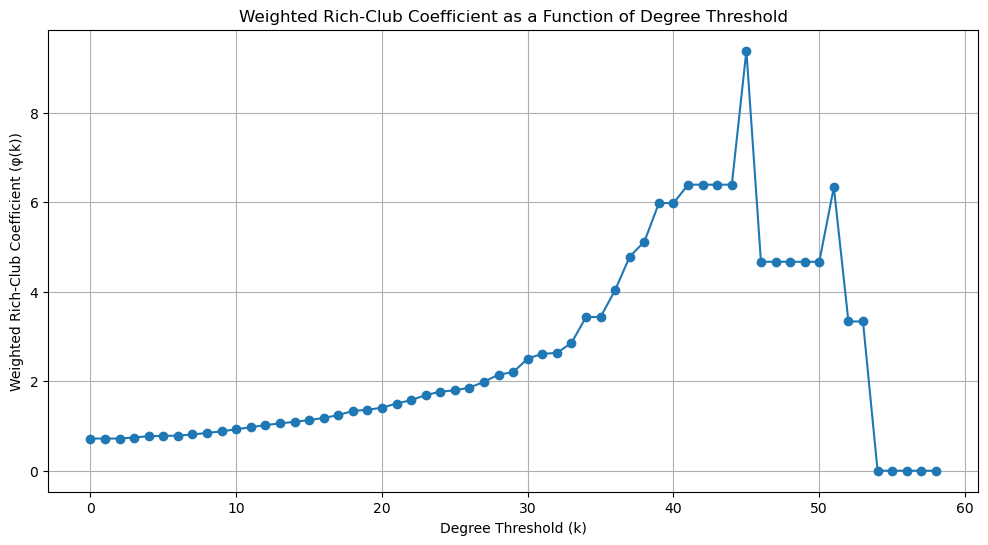

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(range(max_degree + 1), rich_club_coefficients, marker='o')
plt.title('Weighted Rich-Club Coefficient as a Function of Degree Threshold')
plt.xlabel('Degree Threshold (k)')
plt.ylabel('Weighted Rich-Club Coefficient (φ(k))')
plt.grid(True)
plt.show()